In [68]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import cv2 as cv

import numpy as np
from PIL import Image
import dftfilter as dft

- __низькочастотні фільтри__

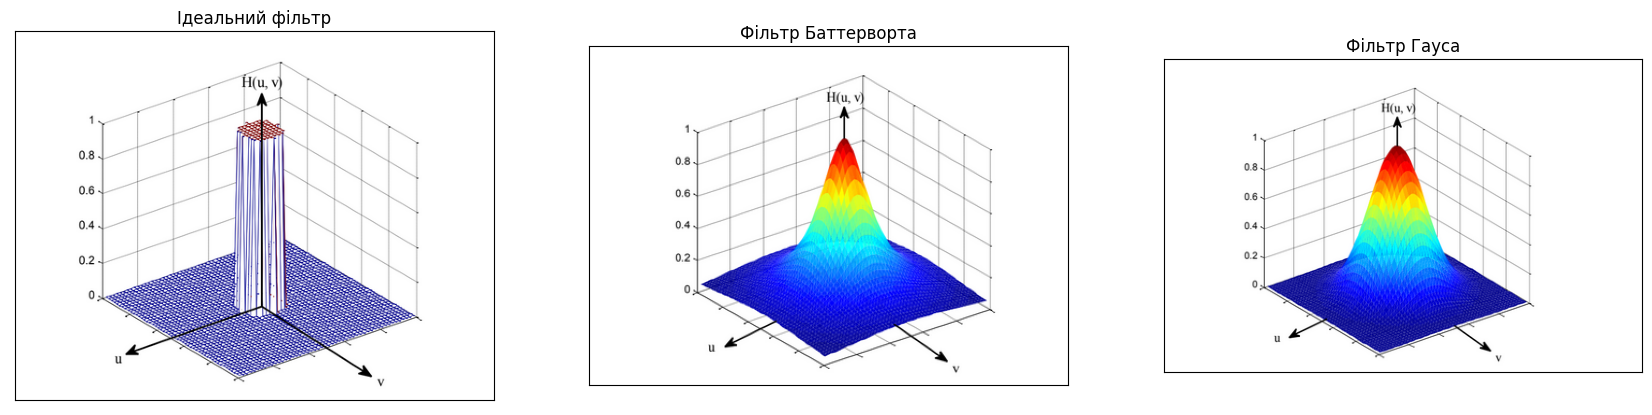

In [69]:
plt.figure(figsize=(21,7))

plt.subplot(1,3,1)
plt.title("Ідеальний фільтр")
plt.imshow(imread("filters/LP_ideal.png"))
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,2)
plt.title("Фільтр Баттерворта")
plt.imshow(imread("filters/LP_batterwoth.png"))
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,3)
plt.title("Фільтр Гауса")
plt.imshow(imread("filters/LP_gauss.png"))
plt.xticks([])
plt.yticks([])

plt.show()

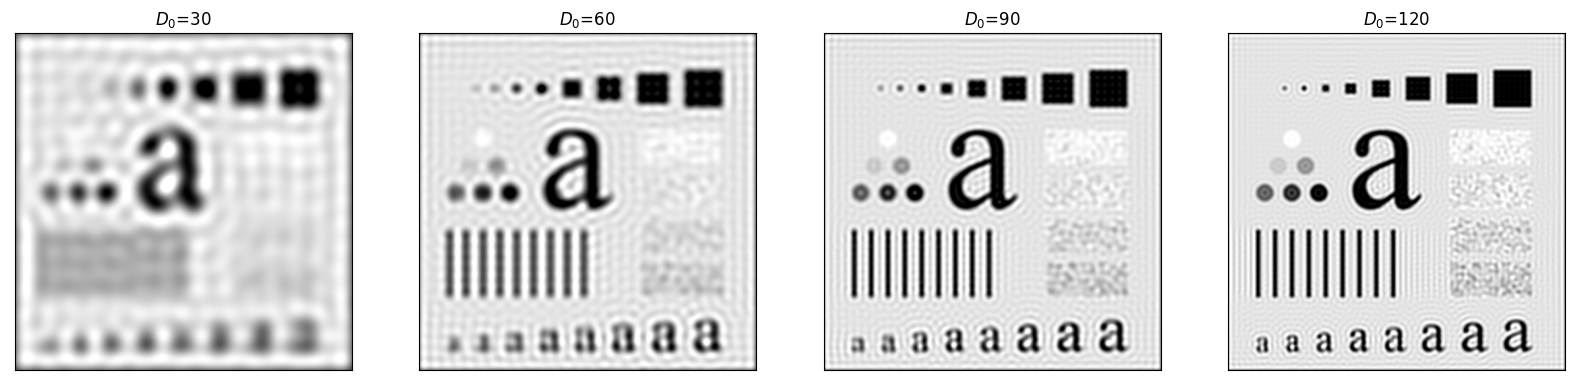

In [70]:
picture = imread("input images/Pic1.jpg")
PQ = dft.paddedsize(picture)

plt.figure(figsize=(20,5))
for i in range(1,5):
    H = dft.lp_filter("ideal", PQ, i*30)
    g = dft.filter(picture, H)

    new_picture = Image.fromarray(g)

    plt.subplot(1,4,i)
    plt.title(f"$D_0$={i*30}")
    plt.imshow(new_picture, cmap="gray")
    plt.xticks([])
    plt.yticks([])

plt.show()

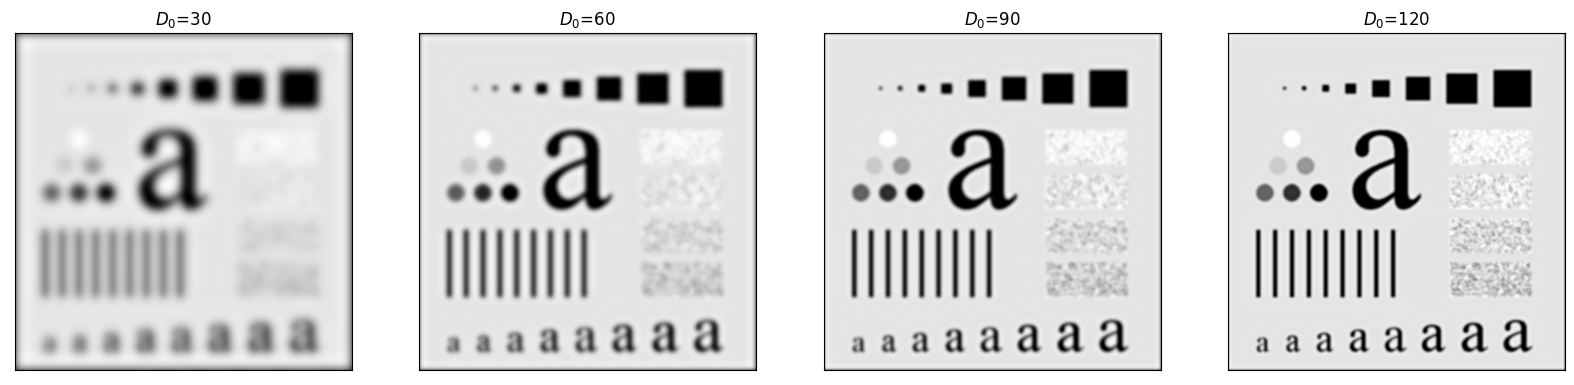

In [71]:
plt.figure(figsize=(20,5))
for i in range(1,5):
    H = dft.lp_filter("btw", PQ, i*30)
    g = dft.filter(picture, H)

    new_picture = Image.fromarray(g)

    plt.subplot(1,4,i)
    plt.title(f"$D_0$={i*30}")
    plt.imshow(new_picture, cmap="gray")
    plt.xticks([])
    plt.yticks([])

plt.show()

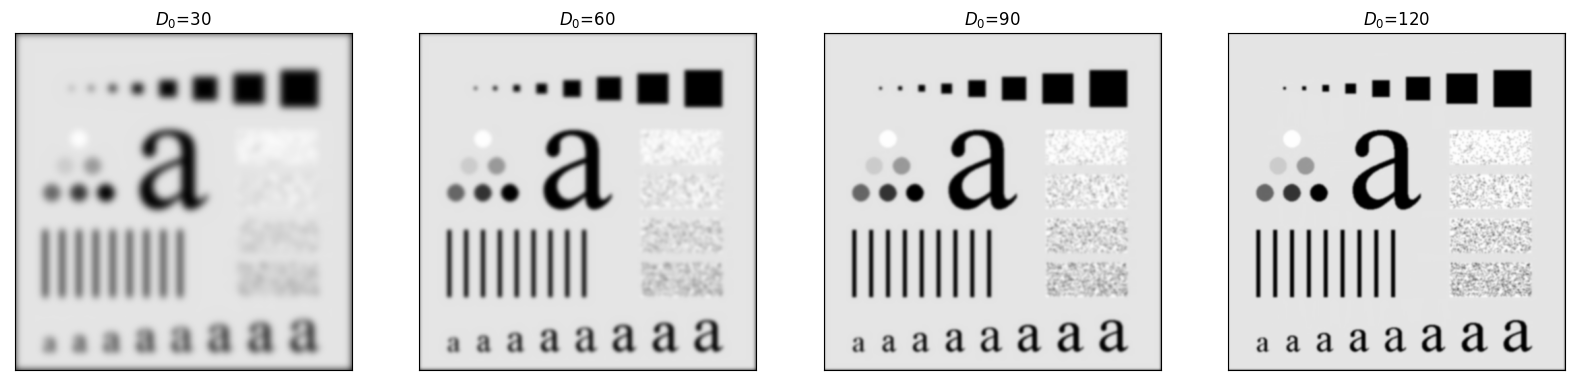

In [72]:
plt.figure(figsize=(20,5))
for i in range(1,5):
    H = dft.lp_filter("gaussian", PQ, i*30)
    g = dft.filter(picture, H)

    new_picture = Image.fromarray(g)

    plt.subplot(1,4,i)
    plt.title(f"$D_0$={i*30}")
    plt.imshow(new_picture, cmap="gray")
    plt.xticks([])
    plt.yticks([])

plt.show()

- __високочастотні фільтри__

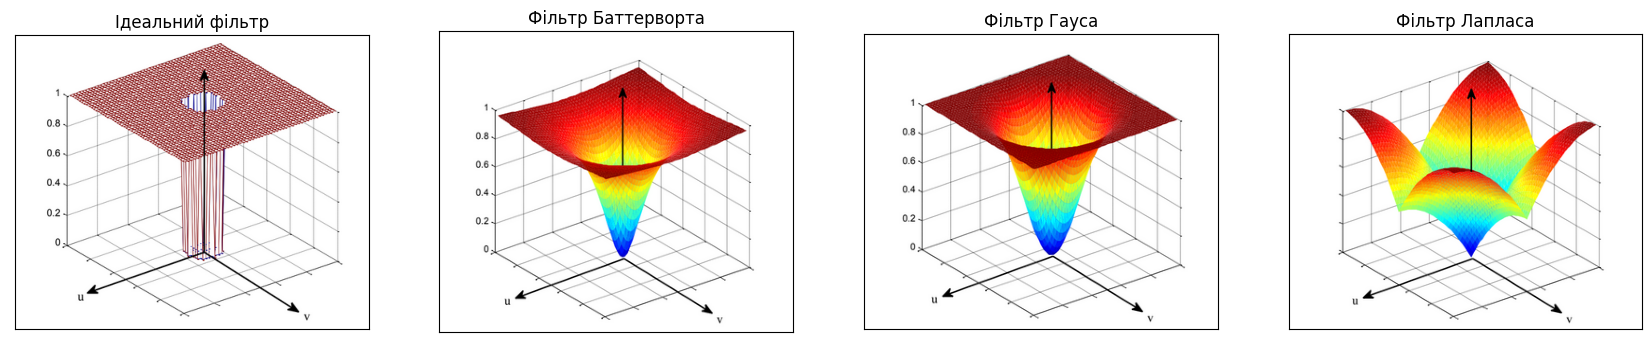

In [79]:
plt.figure(figsize=(21,7))

plt.subplot(1,4,1)
plt.title("Ідеальний фільтр")
plt.imshow(imread("filters/HP_ideal.png"))
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,2)
plt.title("Фільтр Баттерворта")
plt.imshow(imread("filters/HP_batterwoth.png"))
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,3)
plt.title("Фільтр Гауса")
plt.imshow(imread("filters/HP_gauss.png"))
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,4)
plt.title("Фільтр Лапласа")
plt.imshow(imread("filters/HP_laplacian.png"))
plt.xticks([])
plt.yticks([])

plt.show()

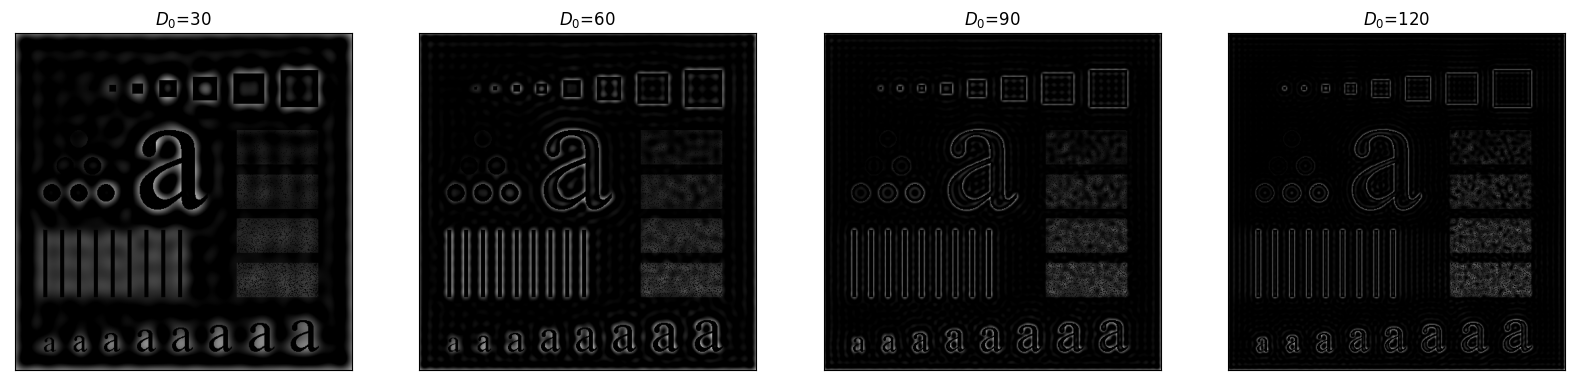

In [74]:
plt.figure(figsize=(20,5))
for i in range(1,5):
    H = dft.hp_filter("ideal", PQ, i*30)
    g = dft.filter(picture, H)

    new_picture = Image.fromarray(g)

    plt.subplot(1,4,i)
    plt.title(f"$D_0$={i*30}")
    plt.imshow(new_picture, cmap="gray")
    plt.xticks([])
    plt.yticks([])

plt.show()

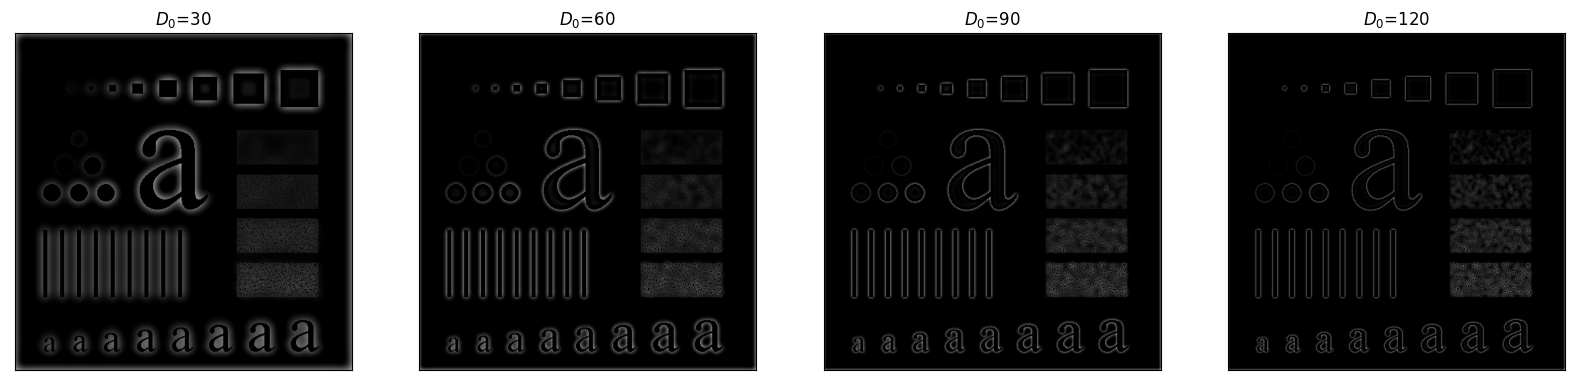

In [75]:
plt.figure(figsize=(20,5))
for i in range(1,5):
    H = dft.hp_filter("btw", PQ, i*30)
    g = dft.filter(picture, H)

    new_picture = Image.fromarray(g)

    plt.subplot(1,4,i)
    plt.title(f"$D_0$={i*30}")
    plt.imshow(new_picture, cmap="gray")
    plt.xticks([])
    plt.yticks([])

plt.show()

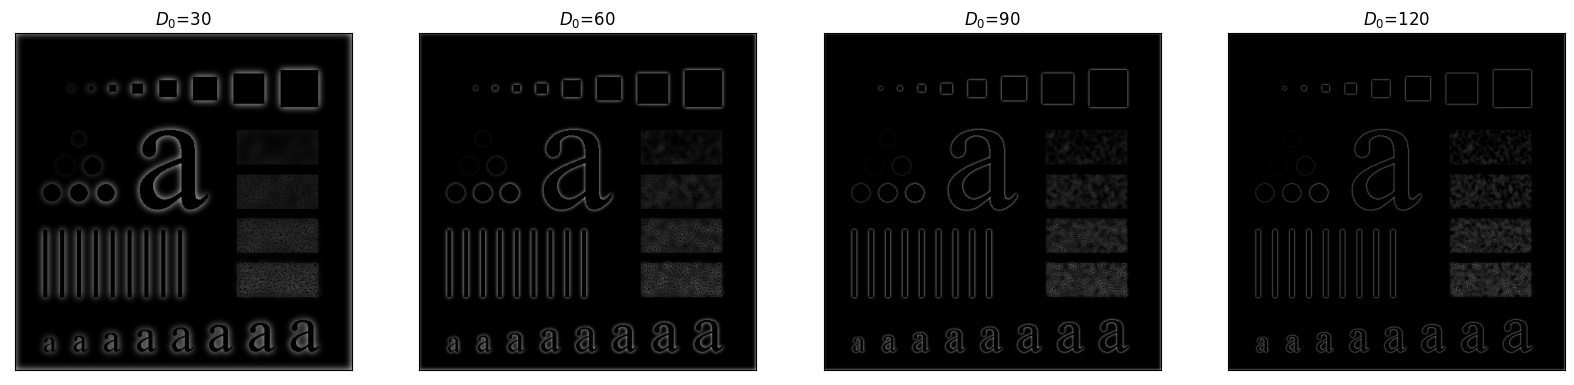

In [76]:
plt.figure(figsize=(20,5))
for i in range(1,5):
    H = dft.hp_filter("gaussian", PQ, i*30)
    g = dft.filter(picture, H)

    new_picture = Image.fromarray(g)

    plt.subplot(1,4,i)
    plt.title(f"$D_0$={i*30}")
    plt.imshow(new_picture, cmap="gray")
    plt.xticks([])
    plt.yticks([])

plt.show()

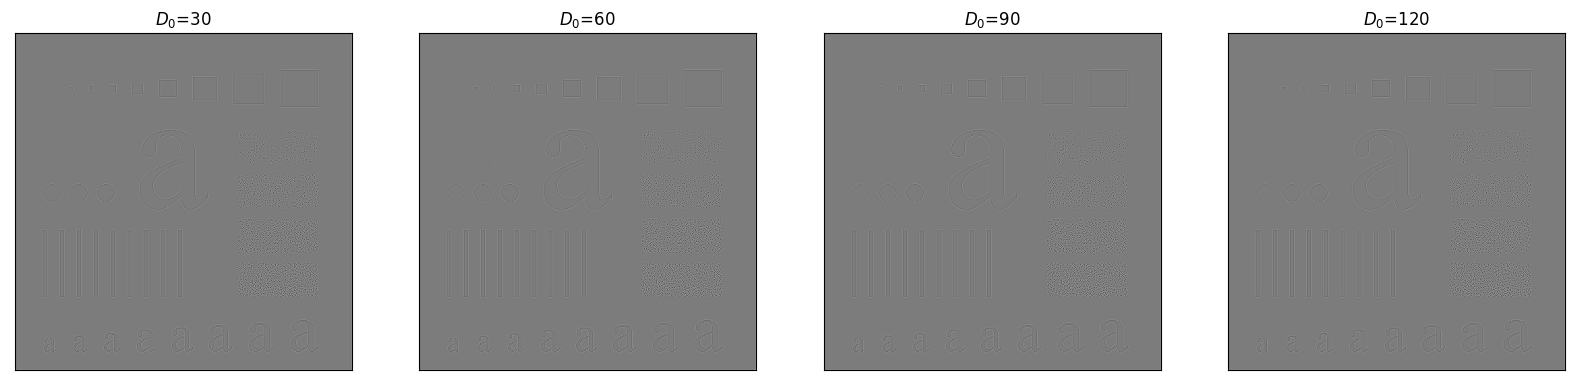

In [77]:
plt.figure(figsize=(20,5))
for i in range(1,5):
    H = dft.hp_filter("laplacian", PQ, i*30)
    g = dft.filter(picture, H)

    new_picture = Image.fromarray(g)

    plt.subplot(1,4,i)
    plt.title(f"$D_0$={i*30}")
    plt.imshow(picture - new_picture, cmap="gray")
    plt.xticks([])
    plt.yticks([])

plt.show()

- __порівняння просторової та частотної обробок__

(512, 512)
(512, 512)


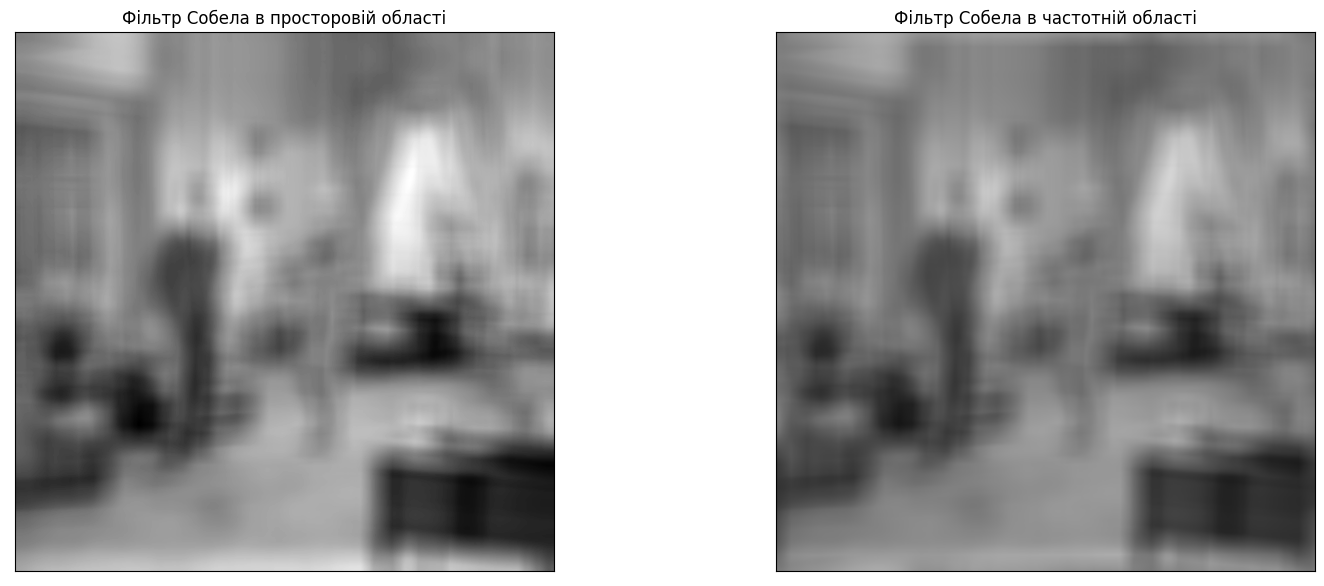

In [85]:
picture = imread("input images/Pic2.jpg")

h = np.array([[1,2,1],
             [0,0,0],
             [-1,-2,-1]])

n = 30
h = np.ones((n,n))
h = h/n**2

filtered_image = cv.filter2D(picture, -1, h)
new_picture = Image.fromarray(filtered_image)

print(filtered_image.shape)

plt.figure(figsize=(18, 7))

plt.subplot(1,2,1)
plt.title("Фільтр Собела в просторовій області")
plt.imshow(new_picture, cmap="gray")
plt.xticks([])
plt.yticks([])

# PQ = dft.paddedsize(picture)

PQ = (512, 512)

H = dft.freqz2(h, PQ[0], PQ[1])
g = dft.filter(picture, H)

new_picture = Image.fromarray(g)

print(g.shape)

plt.subplot(1,2,2)
plt.title("Фільтр Собела в частотній області")
plt.imshow(new_picture, cmap="gray")
plt.xticks([])
plt.yticks([])

plt.show()